In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Student_Performance.csv")
print(df.shape)
df.head()

(10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [312]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [313]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [314]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

# Визуализация

In [315]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

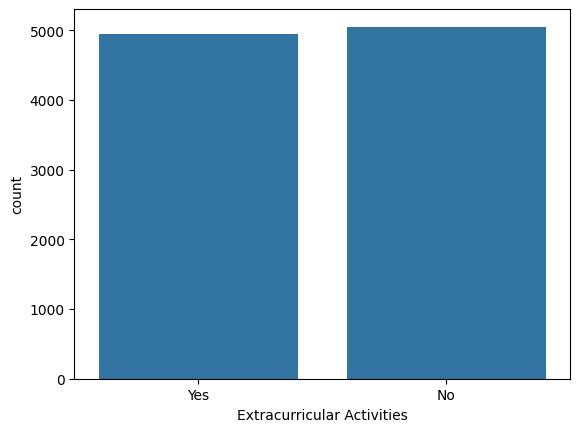

In [316]:
sns.countplot(data=df, x='Extracurricular Activities')

In [317]:
df['Extracurricular Activities']=df['Extracurricular Activities'].replace({"No":0, "Yes":1})

<Axes: xlabel='Hours Studied', ylabel='count'>

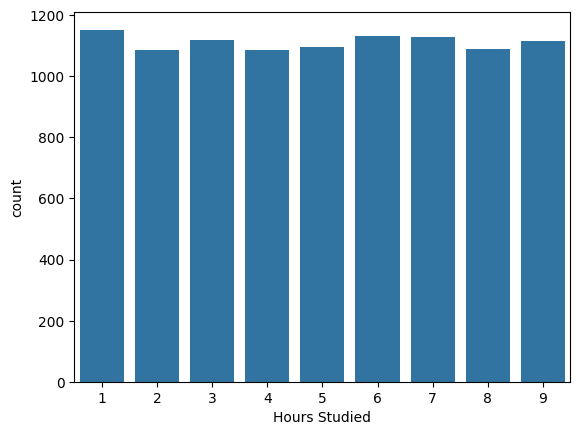

In [318]:
sns.countplot(data=df, x='Hours Studied')

In [319]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

Количество студентов, обучающихся 9 часов, не превышает числа студентов, обучающихся 1 час. Распределение равномерное.

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

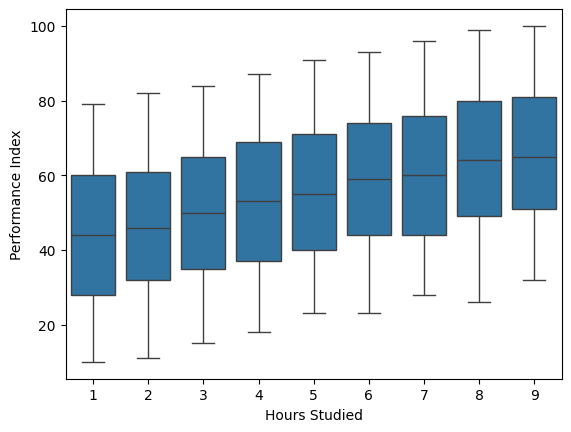

In [320]:
sns.boxplot(data=df, x='Hours Studied', y='Performance Index')

Успеваемость лучше, если студент учится больше часов

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

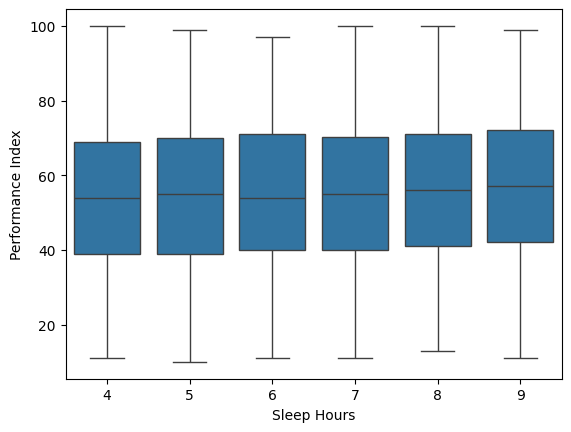

In [321]:
sns.boxplot(data=df, x='Sleep Hours', y='Performance Index')

Увелечение количества сна не приводит к улучшению производительности, все сбалансированно

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

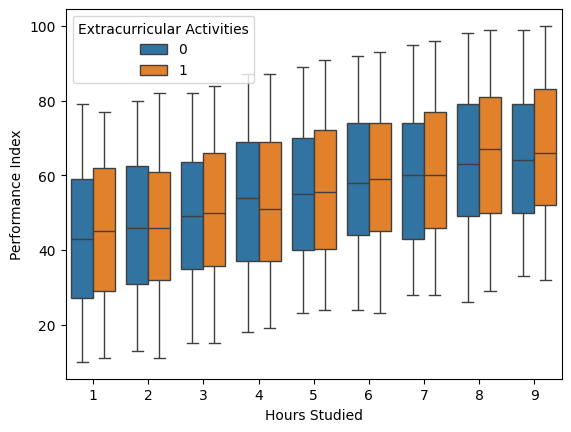

In [322]:
sns.boxplot(data=df, x='Hours Studied', y='Performance Index', hue='Extracurricular Activities')

При большом количестве учебных часов успеваемость выше, внеклассовая деятельность существнно не влиется

In [323]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# Линейная регрессия


In [324]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#var_to_stand=["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Performance Index", axis=1),
    df["Performance Index"],
    test_size=0.25,
    random_state=0
)
#sc = StandardScaler()
#X_train[var_to_stand] = sc.fit_transform(X_train[var_to_stand])
#X_test[var_to_stand] = sc.transform(X_test[var_to_stand])

In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [326]:
lr = LinearRegression()

In [327]:
lr.fit(X_train, y_train)

LinearRegression()

In [328]:
pred_lr = lr.predict(X_test)

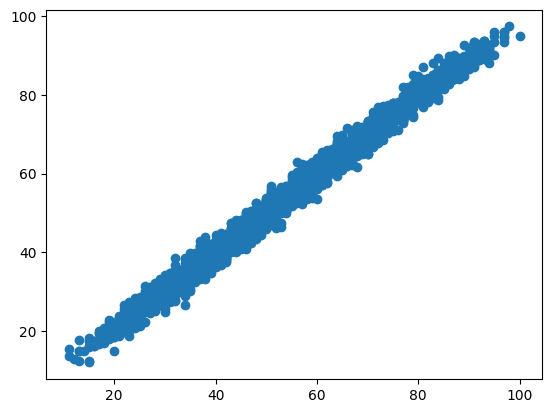

In [329]:
plt.scatter(y_test, pred_lr)

In [330]:
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)
print(f"MSE {mse:.3} | R2 {r2:.3%}")

MSE 4.08 | R2 98.847%


In [331]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [332]:
x_input = [8, 51, 1, 7, 2]
predictions = lr.predict([x_input])[0]
print(predictions)

45.07614540333558


C:\Users\Maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
